In [1]:
source("../jupyter/util.R")
library(repr)
options(warn = -1)

## Normalverteilung mit verschiedenen Standardabweichungen

Betrachte drei Normalverteilungen mit Standardabweichung $\sigma = \frac{1}{2}, 1, 2$

In [2]:
mu <- 0  
sd_values <- c(0.5, 1, 2) 

## Dichtefunktionen

In [3]:
x <- seq(-6, 6, length.out = 200)

plot_data <- data.frame(
  x = rep(x, times = length(sd_values)),
  y = c(dnorm(x, mean = mu, sd = sd_values[1]),
        dnorm(x, mean = mu, sd = sd_values[2]),
        dnorm(x, mean = mu, sd = sd_values[3])),
  sd = factor(rep(sd_values, each = length(x)))
)

p1 <- ggplot(plot_data, aes(x = x, y = y, color = sd)) +
  geom_line(linewidth = 1) +
  ggtitle("Normalverteilungen") +
  xlab("Wert") +
  ylab("Dichte") +
  scale_color_discrete(name = "Standardabweichung")

## Probability-Probability (P-P) Plots

In [4]:
x <- seq(-10, 10, length.out = 200)
ref = pnorm(x, mean = mu, sd = sd_values[2])
plot_data <- data.frame(
  x = rep(ref, times = length(sd_values)),
  y = c(pnorm(x, mean = mu, sd = sd_values[1]),
        ref,
        pnorm(x, mean = mu, sd = sd_values[3])),
  sd = factor(rep(sd_values, each = length(x)))
)
p2 <- ggplot(plot_data, aes(x = x, y = y, color = sd)) +
  geom_line(linewidth = 1, show.legend=FALSE) +
  ggtitle("PP Plot Normalverteilungen") +
  xlab("Standardnormalverteilung") +
  ylab("Normalverteilungen") +
  scale_color_discrete(name = "Standardabweichung")

## Quantil-Quantil (Q-Q) Plots

In [5]:
x <- seq(0, 1, length.out = 100)
ref = qnorm(x, mean = mu, sd = sd_values[2])
plot_data <- data.frame(
  x = rep(ref, times = length(sd_values)),
  y = c(qnorm(x, mean = mu, sd = sd_values[1]),
        ref,
        qnorm(x, mean = mu, sd = sd_values[3])),
  sd = factor(rep(sd_values, each = length(x)))
)

p3 <- ggplot(plot_data, aes(x = x, y = y, color = sd)) +
  geom_point(size=1, show.legend=FALSE) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  ggtitle("Q-Q Plot Normalverteilungen") +
  xlab("Standardnormalverteilung") +
  ylab("Normalverteilungen") +
  xlim(-2.5, 2.5) +
  ylim(-2.5, 2.5)

## Gesamte Darstellung
Zur Anordnung von Plots s.a. [ggplot2: Elegant Graphics for Data Analysis - Arranging Plots](https://ggplot2-book.org/arranging-plots)

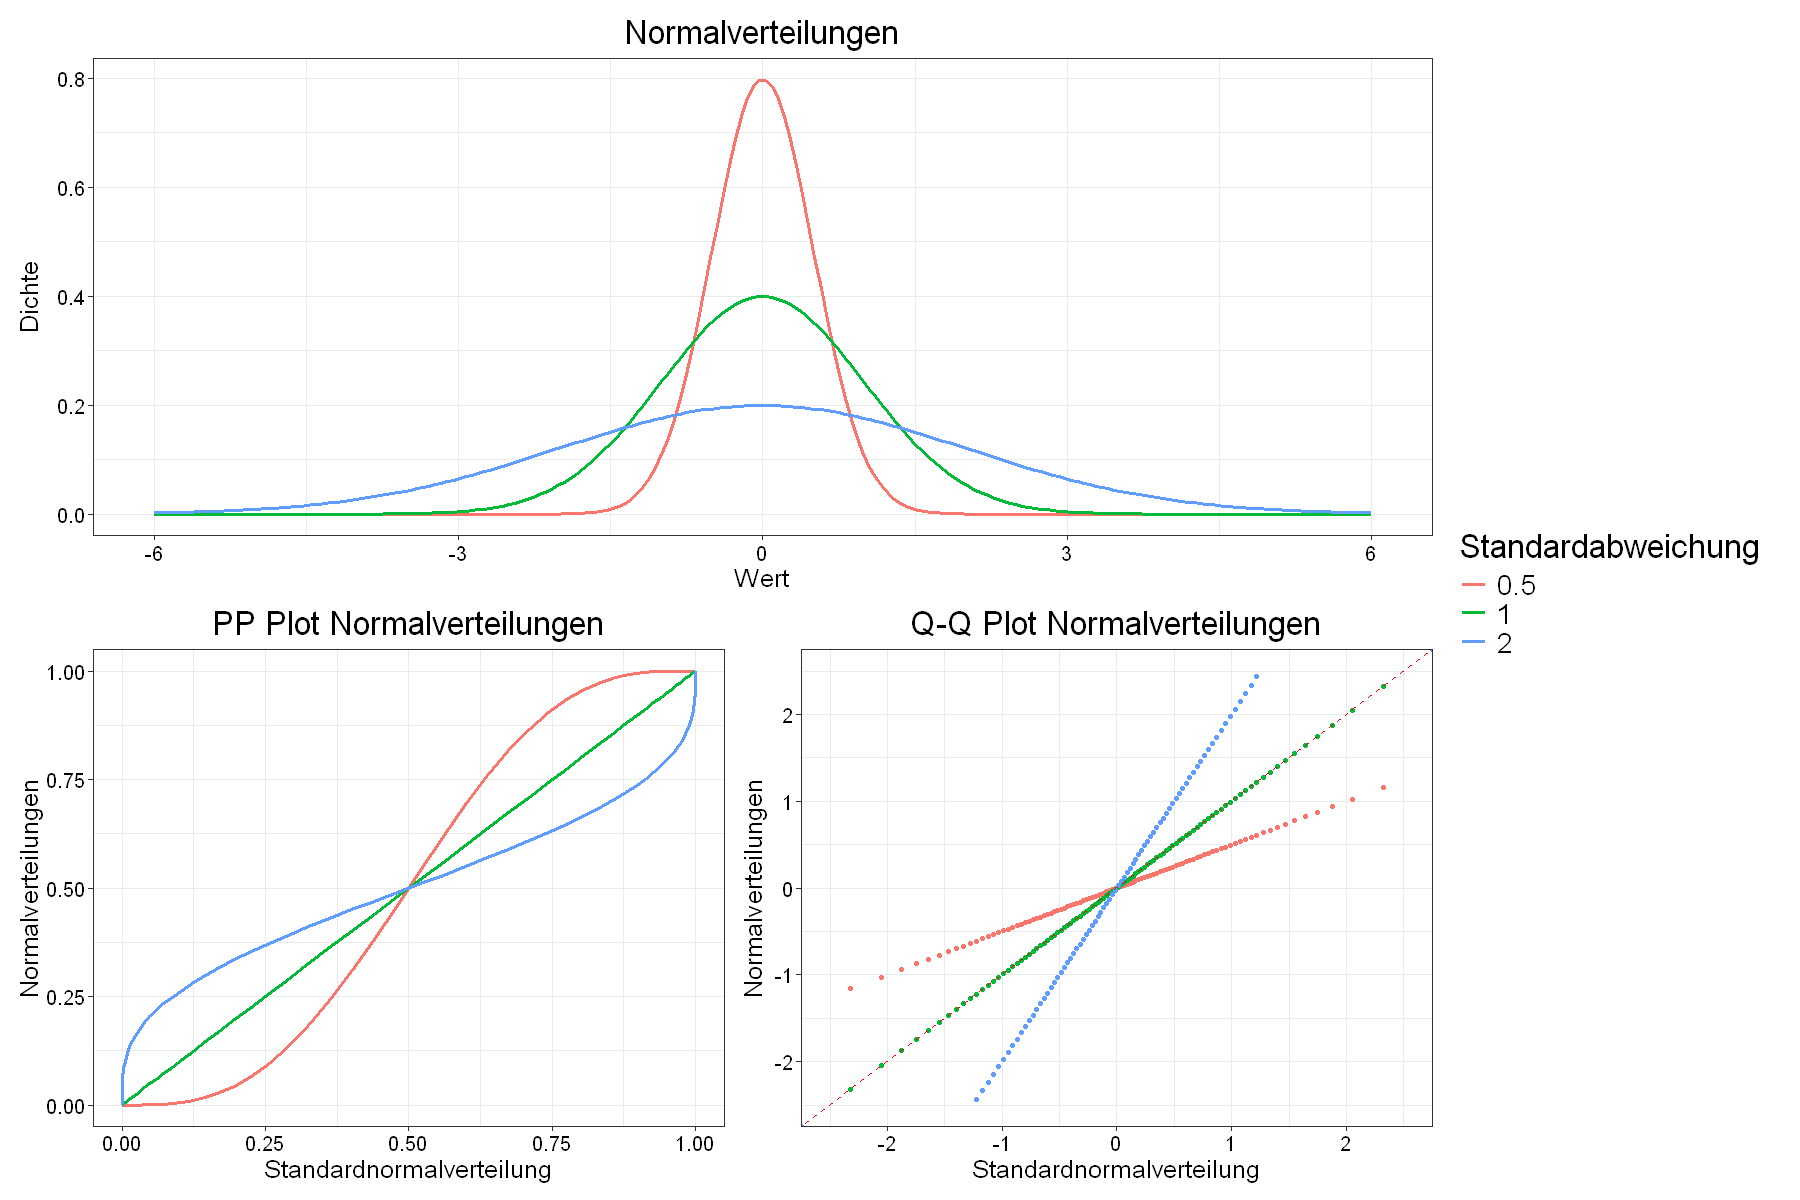

In [7]:
options(repr.plot.width=15, repr.plot.height=10)
plot_theme = jupyter_theme()
p1_themed <- p1 + plot_theme
p2_themed <- p2 + plot_theme
p3_themed <- p3 + plot_theme 

gg <- p1_themed / (p2_themed + p3_themed) + plot_layout(guides = 'collect')
print(gg)